In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

from sklearn import preprocessing

import tensorflow as tf

from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

from scipy import stats


In [4]:
data = pd.read_csv("data.csv")

In [5]:
# list(data['native-country'].unique())

In [6]:
data.head()

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
# data = data.replace({'?': np.nan})
# for col in data.columns:
#     data[col] = data[col].fillna(data[col].mode()[0])
    
data = data[~(data.T == '?').any()]

In [9]:
position_mapping = {
    'Other-service': 1,   # 2161 100     21.6%
    'Priv-house-serv': 2,  # 108 0
    'Handlers-cleaners': 3, # 845 59     14.2%
    'Farming-fishing': 4,  # 602 80      7.5%
    'Machine-op-inspct': 5, # 1227 165   7.4%
    'Adm-clerical': 6,    # 2324 354    6.5%
    'Armed-Forces': 7,   # 7 0
    'Transport-moving': 8,  # 867 230    3.8%
    'Craft-repair': 9,    # 2177 627     3.47%
    'Protective-serv': 10,  # 308 145     2.1%
    'Sales': 11,         # 1864 665      2.8%
    'Tech-support': 12,     # 433 196     2.2%
    'Prof-specialty': 13, # 1572 1257    1.3%
    'Exec-managerial': 14 # 1407 1328    1.1%
}

# Use the mapping dictionary to transform the data
data['position_encoded'] = data['position'].map(position_mapping)

data.drop('position', axis=1, inplace=True)

In [10]:
workclass_mapping = {
    'Never-worked': 1,
    'Without-pay': 2,
    'Local-gov': 3,
    'Self-emp-not-inc': 4,
    'State-gov': 5,
    'Federal-gov': 6,
    'Self-emp-inc': 7,
    'Private': 8
}

# Use the mapping dictionary to transform the data
data['work-class_encoded'] = data['work-class'].map(workclass_mapping)

data.drop('work-class', axis=1, inplace=True)

In [11]:
marital_status_mapping = {
    'Divorced': 1,
    'Widowed': 2,
    'Separated': 3,
    'Never-married': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6,
    'Married-civ-spouse': 7
}

# Use the mapping dictionary to transform the data
data['marital-status_encoded'] = data['marital-status'].map(marital_status_mapping)

data.drop('marital-status', axis=1, inplace=True)

In [12]:
relationship_mapping = {
    'Not-in-family': 1,
    'Wife': 2,
    'Own-child': 3,
    'Unmarried': 4,
    'Other-relative': 5, 
    'Husband': 6
}

# Use the mapping dictionary to transform the data
data['relationship_encoded'] = data['relationship'].map(relationship_mapping)

data.drop('relationship', axis=1, inplace=True)

In [13]:
race_mapping = {
    'Other': 1,                 # 156  12       13.0%
    'Amer-Indian-Eskimo': 2,    # 179  25       7.04%
    'Black': 6,                 # 1712 256      6.68%
    'Asian-Pac-Islander': 7,    # 448 162       2.76%
    'White': 13,                 # 13407 4751    2.8%
}

# Use the mapping dictionary to transform the data
data['race_encoded'] = data['race'].map(race_mapping)

data.drop('race', axis=1, inplace=True)

In [14]:
sex_mapping = {
    'Female': 2,
    'Male': 7
}

# Use the mapping dictionary to transform the data
data['sex_encoded'] = data['sex'].map(sex_mapping)

data.drop('sex', axis=1, inplace=True)

In [15]:
native_country_mapping = {
    'United-States': 50,
    'Holand-Netherlands': 43,
    'Canada': 42,
    'Hong': 41,
    'Germany': 40,
    'England': 39,
    'Ireland': 38,
    'Japan': 37,
    'France': 36,
    'Scotland': 35,
    'South': 34,
    'Puerto-Rico': 32,
    'Italy': 31,
    'Taiwan': 30,
    'China': 29,
    'Portugal': 28,
    'Poland': 27,
    'Trinadad&Tobago': 26,
    'Hungary': 25,
    'Greece': 24,
    'India': 23,
    'Mexico': 22,
    'Jamaica': 21,
    'Columbia': 20,
    'Thailand': 19,
    'Honduras': 18,
    'Guatemala': 17,
    'Cuba': 16,
    'Ecuador': 15,
    'Vietnam': 14,
    'El-Salvador': 13,
    'Peru': 12,
    'Dominican-Republic': 11,
    'Iran': 10,
    'Philippines': 9,
    'Yugoslavia': 8,
    'Cambodia': 7,
    'Laos': 6,
    'Haiti': 5,
    'Outlying-US(Guam-USVI-etc)': 4,
    'Nicaragua': 3,
}

# Use the mapping dictionary to transform the data
data['native-country_encoded'] = data['native-country'].map(native_country_mapping)

data.drop('native-country', axis=1, inplace=True)

In [16]:
# salaries where position is Exec-managerial
data[data['native-country_encoded'] == 32]['salary'].value_counts()

<=50K    75
>50K     10
Name: salary, dtype: int64

In [17]:
data = data.drop('education', axis=1)
# data = data.drop('race_encoded', axis=1)
# data = data.drop('native-country_encoded', axis=1)
# data = data.drop('work-fnl', axis=1)
# data = data.drop('work-class_encoded', axis=1)

In [58]:
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,position_encoded,marital-status_encoded,relationship_encoded,sex_encoded
0,39,13,2174,0,40,<=50K,6,4,1,7
1,50,13,0,0,13,<=50K,14,7,6,7
2,38,9,0,0,40,<=50K,3,1,1,7
3,53,7,0,0,40,<=50K,3,7,6,7
4,28,13,0,0,40,<=50K,13,7,2,2


In [18]:
data = data.drop_duplicates()
data.shape

(21108, 14)

In [60]:
# data = pd.get_dummies(data, columns=['position'], prefix='position')
# data = pd.get_dummies(data, columns=['native-country'], prefix='country')
# data = pd.get_dummies(data, columns=['work-class'], prefix='work')
# data = pd.get_dummies(data, columns=['marital-status'], prefix='marital')
# data = pd.get_dummies(data, columns=['relationship'], prefix='relationship')
# data = pd.get_dummies(data, columns=['race'], prefix='race')
# data = pd.get_dummies(data, columns=['sex'], prefix='sex')

# data.insert(63, 'work_Never-worked', 0)

In [19]:
le = preprocessing.LabelEncoder()

data.replace(['<=50K', '>50K'],
             [0, 1], inplace=True)

# data['salary'] = le.fit_transform(data.salary.values)
# data['position'] = le.fit_transform(data.position.values)
# data['native-country'] = le.fit_transform(data['native-country'].values)
# data['work-class'] = le.fit_transform(data['work-class'].values)
# data['marital-status'] = le.fit_transform(data['marital-status'].values)
# data['relationship'] = le.fit_transform(data['relationship'].values)
# data['race'] = le.fit_transform(data['race'].values)
# data['sex'] = le.fit_transform(data['sex'].values)

In [62]:
data.corr()['salary'].sort_values( ascending=False)

salary                    1.000000
marital-status_encoded    0.382176
education-num             0.322886
position_encoded          0.318952
relationship_encoded      0.308075
capital-gain              0.231474
hours-per-week            0.219276
age                       0.212197
sex_encoded               0.209748
capital-loss              0.155085
Name: salary, dtype: float64

In [63]:
data.corr()['salary'].sort_values(ascending=False)

salary                    1.000000
marital-status_encoded    0.382176
education-num             0.322886
position_encoded          0.318952
relationship_encoded      0.308075
capital-gain              0.231474
hours-per-week            0.219276
age                       0.212197
sex_encoded               0.209748
capital-loss              0.155085
Name: salary, dtype: float64

In [64]:
def remove_outlier_IQR(df):
    num_columns = [x for x in data.columns if data[x].dtype !=object]
    reduced_df=data[num_columns]
    Q1=reduced_df.quantile(0.25)
    Q3=reduced_df.quantile(0.75)
    IQR=Q3-Q1
    df_final_index=reduced_df[~((reduced_df<(Q1-1.5*IQR)) | (reduced_df>(Q3+1.5*IQR)))].index
    return data.loc[df_final_index.values]

In [65]:
# data = remove_outlier_IQR(data)

In [66]:
# balance data
# X = data.drop('salary', axis = 1)
# y = data['salary']
# robust = RobustScaler()
# X_scaled = robust.fit_transform(X)

In [582]:
# data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [20]:
train_dataset = data.sample(frac=0.9, random_state=0)
test_dataset = data.drop(train_dataset.index)


In [21]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('salary')
test_labels = test_features.pop('salary')


In [22]:
normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))


In [586]:
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(128, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          bias_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          bias_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          bias_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          bias_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          bias_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          bias_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(2)
])


In [587]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [588]:
r = model.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=45)


Epoch 1/45
594/594 [==============================] - 5s 7ms/step - loss: 6.8098 - accuracy: 0.7779 - val_loss: 5.0269 - val_accuracy: 0.8285
Epoch 2/45
594/594 [==============================] - 3s 6ms/step - loss: 3.8742 - accuracy: 0.8299 - val_loss: 2.9219 - val_accuracy: 0.8394
Epoch 3/45
594/594 [==============================] - 3s 6ms/step - loss: 2.2962 - accuracy: 0.8339 - val_loss: 1.7788 - val_accuracy: 0.8389
Epoch 4/45
594/594 [==============================] - 3s 5ms/step - loss: 1.4482 - accuracy: 0.8368 - val_loss: 1.1784 - val_accuracy: 0.8380
Epoch 5/45
594/594 [==============================] - 3s 5ms/step - loss: 1.0114 - accuracy: 0.8393 - val_loss: 0.8707 - val_accuracy: 0.8404
Epoch 6/45
594/594 [==============================] - 3s 5ms/step - loss: 0.7875 - accuracy: 0.8388 - val_loss: 0.7130 - val_accuracy: 0.8432
Epoch 7/45
594/594 [==============================] - 3s 5ms/step - loss: 0.6697 - accuracy: 0.8409 - val_loss: 0.6271 - val_accuracy: 0.8427
Epoch 

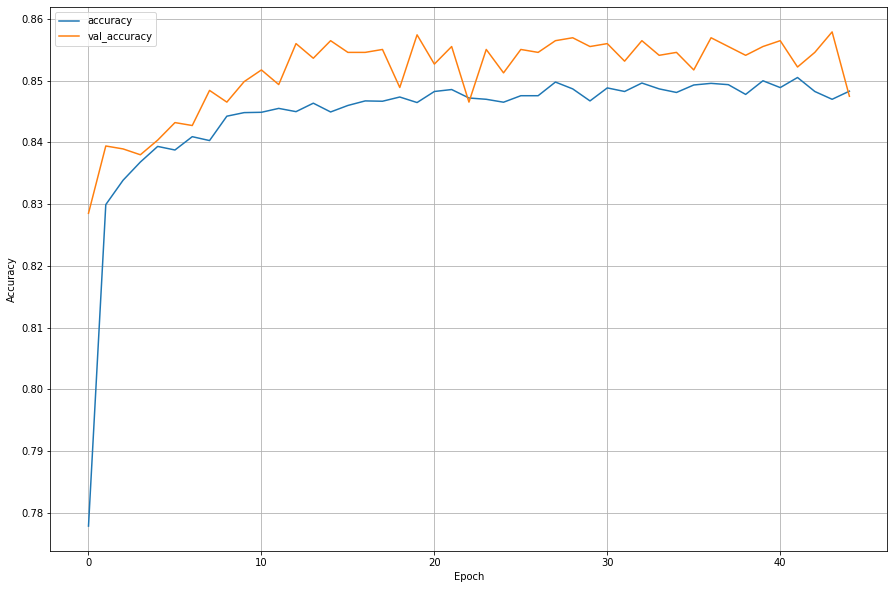

In [589]:
def plot_loss(history):
    plt.figure(figsize=(15, 10))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_loss(r)

In [69]:
test = pd.read_csv('test.csv')
test = test.applymap(lambda x: x.strip() if isinstance(x, str) else x)
test = test.replace('?', np.nan)

# test = pd.get_dummies(test, columns=['position'], prefix='position')
# test = pd.get_dummies(test, columns=['native-country'], prefix='country')
# test = pd.get_dummies(test, columns=['work-class'], prefix='work')
# test = pd.get_dummies(test, columns=['marital-status'], prefix='marital')
# test = pd.get_dummies(test, columns=['relationship'], prefix='relationship')
# test = pd.get_dummies(test, columns=['race'], prefix='race')
# test = pd.get_dummies(test, columns=['sex'], prefix='sex')

test['position_encoded'] = test['position'].map(position_mapping)
test.drop('position', axis=1, inplace=True)

test['work-class_encoded'] = test['work-class'].map(workclass_mapping)
test.drop('work-class', axis=1, inplace=True)

test['marital-status_encoded'] = test['marital-status'].map(marital_status_mapping)
test.drop('marital-status', axis=1, inplace=True)

test['relationship_encoded'] = test['relationship'].map(relationship_mapping)
test.drop('relationship', axis=1, inplace=True)

test['race_encoded'] = test['race'].map(race_mapping)
test.drop('race', axis=1, inplace=True)

test['sex_encoded'] = test['sex'].map(sex_mapping)
test.drop('sex', axis=1, inplace=True)

test['native-country_encoded'] = test['native-country'].map(native_country_mapping)
test.drop('native-country', axis=1, inplace=True)

test = test.drop('education', axis=1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'reg_lambda': [0.1, 0.4, 0.7],
    'reg_alpha': [0.1, 1.6, 3.0],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.15, 0.2],
    'gamma': [0.5, 1, 1.5]
}

model = XGBClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(train_features, train_labels)

print(grid_search.best_params_)


In [23]:
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

xgb = XGBClassifier(reg_lambda=0.4, reg_alpha=1.6, max_depth=7, learning_rate=0.15, gamma=1)

xgb.fit(train_features, train_labels)

y_pred = xgb.predict(test_features)
accuracy = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.87
F1 Score: 0.72


In [662]:
y_pred = xgb.predict(test)

predictions_df = pd.DataFrame({"salary": y_pred})

predictions_df["salary"] = predictions_df["salary"].apply(lambda x: " >50K" if x == 1 else " <=50K")  # Add leading space and change values to strings

predictions_df.to_csv("submission.csv", index_label="index")

In [592]:
predictions = model.predict(test)
predictions = np.argmax(predictions, axis=1)

306/306 [==============================] - 1s 2ms/step


In [593]:
submission = pd.DataFrame({'index': test.index, 'salary': predictions})

submission['salary'].replace([0, 1], ['<=50K', '>50K'], inplace=True)

submission.to_csv('submission.csv', index=False)


In [594]:
df = pd.read_csv('submission.csv')

df['salary'] = df['salary'].apply(lambda x: ' ' + x)

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_file.csv', index=False)